1 | Data Overview

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme similar to theme_minimal()
sns.set_theme(style="whitegrid")

# Load dataset
telco = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")




In [2]:
telco.shape

(7043, 21)

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [4]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:

# Convert character columns to categorical
for col in telco.select_dtypes(include="object").columns:
    telco[col] = telco[col].astype("category")


In [8]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [9]:
# Convert SeniorCitizen to categorical
telco["SeniorCitizen"] = telco["SeniorCitizen"].astype("category")

In [10]:

# Drop customerID column
telco = telco.drop(columns=["customerID"])

In [11]:
# Recode phone service column 
colnames = telco.columns
telco[colnames[6]] = telco[colnames[6]].apply(lambda x: "No" if x in ["No phone service", "No"] else "Yes")


In [12]:
# Recode InternetService column
telco[colnames[7]] = telco[colnames[7]].apply(lambda x: "FiberOptic" if x == "Fiber optic"
                                              else "DSL" if x == "DSL"
                                              else "No")

In [13]:
# Recode columns
for col in colnames[8:14]:
    telco[col] = telco[col].apply(lambda x: "No" if x in ["No internet service", "No"] else "Yes")

In [14]:

# Recode PaymentMethod
telco[colnames[16]] = telco[colnames[16]].apply(lambda x: "BankTransferAuto" if x == "Bank transfer (automatic)"
                                                else "CreditCardAuto" if x == "Credit card (automatic)"
                                                else "ECheck" if x == "Electronic check"
                                                else "MailedCheck")

In [15]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,ECheck,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,MailedCheck,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,MailedCheck,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,BankTransferAuto,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,FiberOptic,No,No,No,No,No,No,Month-to-month,Yes,ECheck,70.70,151.65,Yes


In [16]:
# Remove missing values
telco = telco.dropna()

In [17]:
# Group by gender and summarize
summary = telco.groupby("gender").agg(
    Number_of_Observations=("gender", "count"),
    Average_Tenure=("tenure", lambda x: round(x.mean(), 0)),
    Monthly_Charges=("MonthlyCharges", lambda x: round(x.mean(), 2))
).reset_index()

# Rename column for consistency
summary = summary.rename(columns={"gender": "Gender"})

print(summary)

   Gender  Number_of_Observations  Average_Tenure  Monthly_Charges
0  Female                    3488            32.0            65.20
1    Male                    3555            32.0            64.33


here is an approximately equal proportion of men and women in the data set. Their average bill is around $65/month, and the tenure of both groups is a little over 2 and a half years

2 | EDA

current and former customers tenure and monthly charges ?

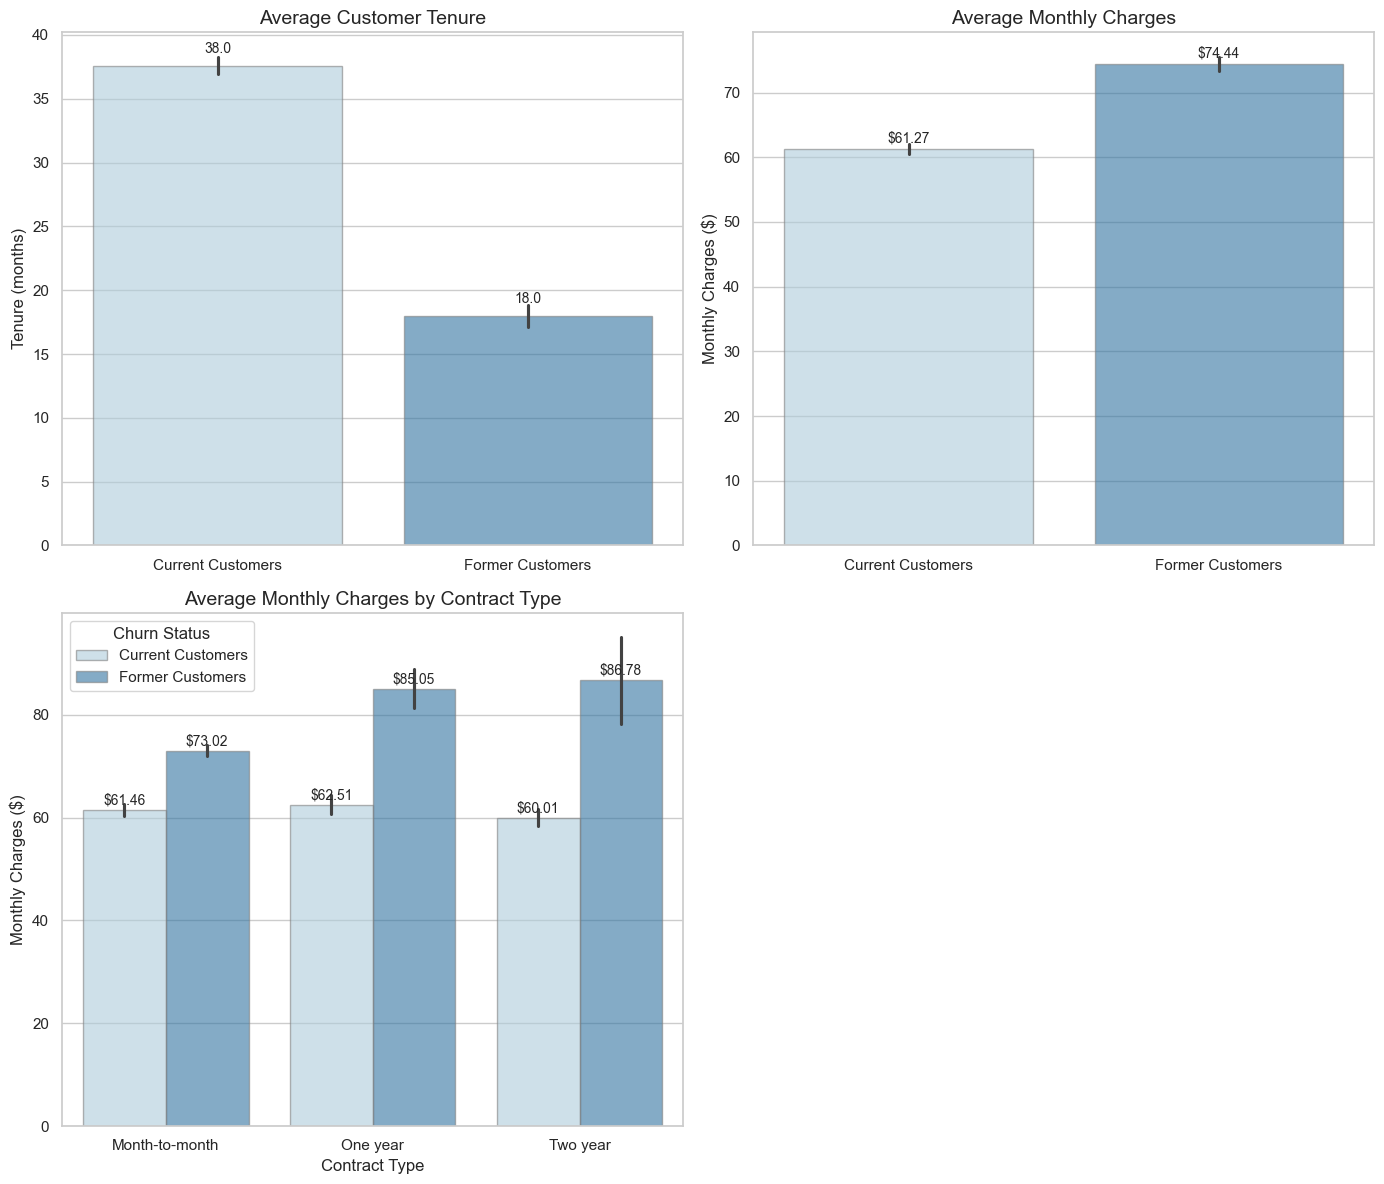

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create Churn2 column
telco["Churn2"] = np.where(telco["Churn"] == "Yes", "Former Customers", "Current Customers")

sns.set_theme(style="whitegrid")

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# --- Plot 1: Average Customer Tenure ---
sns.barplot(
    data=telco, x="Churn2", y="tenure", estimator=np.mean,
    palette="Paired", alpha=0.6, edgecolor="grey", ax=axes[0, 0]
)
axes[0, 0].set_title("Average Customer Tenure", fontsize=14)
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Tenure (months)")

# Add mean values on top
for i, v in enumerate(telco.groupby("Churn2")["tenure"].mean()):
    axes[0, 0].text(i, v + 1, f"{round(v, 0)}", ha='center', fontsize=10)

# --- Plot 2: Average Monthly Charges ---
sns.barplot(
    data=telco, x="Churn2", y="MonthlyCharges", estimator=np.mean,
    palette="Paired", alpha=0.6, edgecolor="grey", ax=axes[0, 1]
)
axes[0, 1].set_title("Average Monthly Charges", fontsize=14)
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("Monthly Charges ($)")

# Add mean values on top
for i, v in enumerate(telco.groupby("Churn2")["MonthlyCharges"].mean()):
    axes[0, 1].text(i, v + 1, f"${round(v, 2)}", ha='center', fontsize=10)

# --- Plot 3: Average Monthly Charges by Contract Type ---
sns.barplot(
    data=telco, x="Contract", y="MonthlyCharges", hue="Churn2", estimator=np.mean,
    palette="Paired", alpha=0.6, edgecolor="grey", ax=axes[1, 0]
)
axes[1, 0].set_title("Average Monthly Charges by Contract Type", fontsize=14)
axes[1, 0].set_xlabel("Contract Type")
axes[1, 0].set_ylabel("Monthly Charges ($)")
axes[1, 0].legend(title="Churn Status")

# Add mean values on top of bars
grouped_means = telco.groupby(["Contract", "Churn2"])["MonthlyCharges"].mean().reset_index()
for row in grouped_means.itertuples():
    x_pos = list(telco["Contract"].unique()).index(row.Contract)
    offset = 0.2 if row.Churn2 == "Former Customers" else -0.2
    axes[1, 0].text(x_pos + offset, row.MonthlyCharges + 1, f"${round(row.MonthlyCharges, 2)}",
                    ha='center', fontsize=10)

# --- Hide the empty subplot (bottom-right) ---
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


The graphs above show the average tenure of Telco's current and former customers and their monthly charges. Telco's current customers have been with the company for just over 3 years, while customers who left kept their services for about 18 months. Additionally, former customers had higher monthly charges on average by about $13. This holds true across each contract type.


2.2 | What type of account services do customers have?


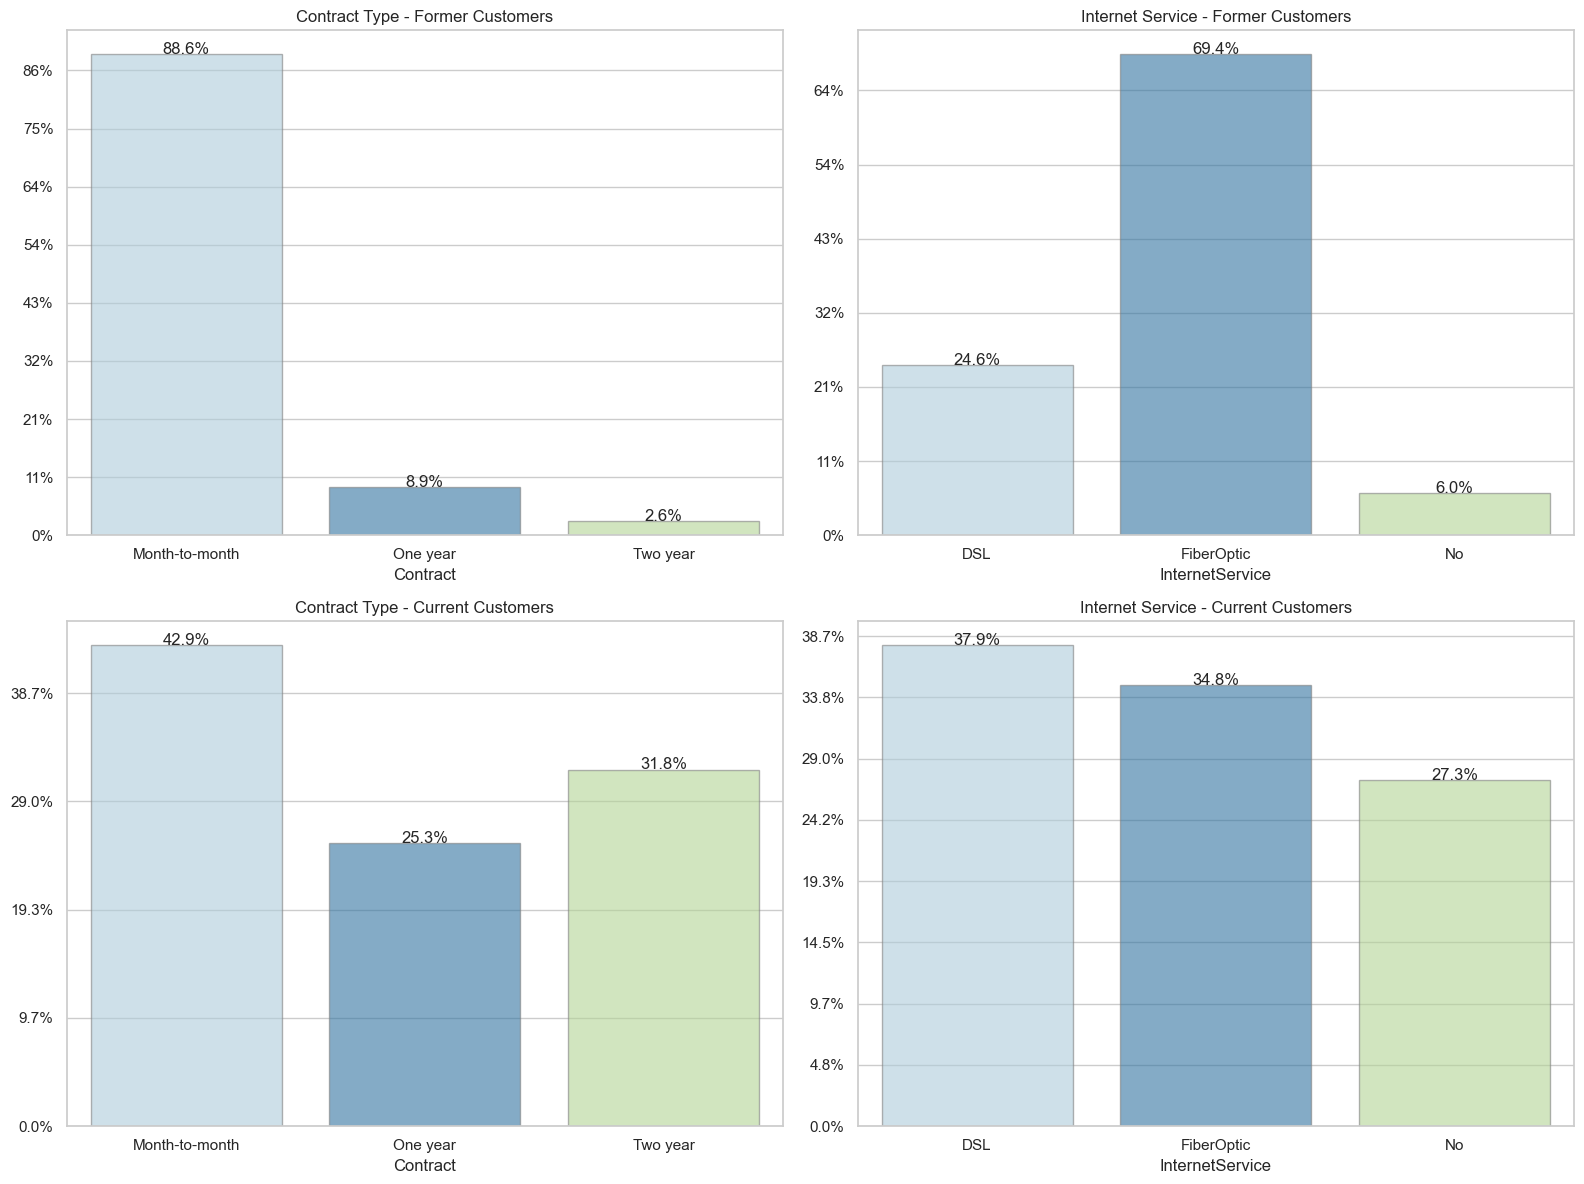

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Churn2 column
telco["Churn2"] = np.where(telco["Churn"]=="Yes", "Former Customers", "Current Customers")

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16,12))  # 2 rows, 2 columns
axes = axes.ravel()  # flatten

# --- Contract Type - Former ---
data = telco[telco["Churn2"]=="Former Customers"]
sns.countplot(data=data, x="Contract", palette="Paired", alpha=0.6, edgecolor="grey", ax=axes[0])
axes[0].set_title("Contract Type - Former Customers")
axes[0].set_ylabel("")
axes[0].yaxis.set_major_formatter(PercentFormatter(xmax=len(data)))  # scale to percentage

# Add labels
for p in axes[0].patches:
    count = p.get_height()
    percent = count / len(data)
    x = p.get_x() + p.get_width()/2
    axes[0].text(x, count+0.5, f"{percent:.1%}", ha='center')

# --- Internet Service - Former ---
sns.countplot(data=data, x="InternetService", palette="Paired", alpha=0.6, edgecolor="grey", ax=axes[1])
axes[1].set_title("Internet Service - Former Customers")
axes[1].set_ylabel("")
axes[1].yaxis.set_major_formatter(PercentFormatter(xmax=len(data)))

for p in axes[1].patches:
    count = p.get_height()
    percent = count / len(data)
    x = p.get_x() + p.get_width()/2
    axes[1].text(x, count+0.5, f"{percent:.1%}", ha='center')

# --- Contract Type - Current ---
data = telco[telco["Churn2"]=="Current Customers"]
sns.countplot(data=data, x="Contract", palette="Paired", alpha=0.6, edgecolor="grey", ax=axes[2])
axes[2].set_title("Contract Type - Current Customers")
axes[2].set_ylabel("")
axes[2].yaxis.set_major_formatter(PercentFormatter(xmax=len(data)))

for p in axes[2].patches:
    count = p.get_height()
    percent = count / len(data)
    x = p.get_x() + p.get_width()/2
    axes[2].text(x, count+0.5, f"{percent:.1%}", ha='center')

# --- Internet Service - Current ---
sns.countplot(data=data, x="InternetService", palette="Paired", alpha=0.6, edgecolor="grey", ax=axes[3])
axes[3].set_title("Internet Service - Current Customers")
axes[3].set_ylabel("")
axes[3].yaxis.set_major_formatter(PercentFormatter(xmax=len(data)))

for p in axes[3].patches:
    count = p.get_height()
    percent = count / len(data)
    x = p.get_x() + p.get_width()/2
    axes[3].text(x, count+0.5, f"{percent:.1%}", ha='center')

plt.tight_layout()
plt.show()


89 percent of former customers pay month-to-month with much smaller percentage for one and two years ,almost 70 percent of the former customers  had fiber optic internet connection so the company had to find a solution because almost one third of current customers had this type of internet

2.3 | Customer Attrition Demographics

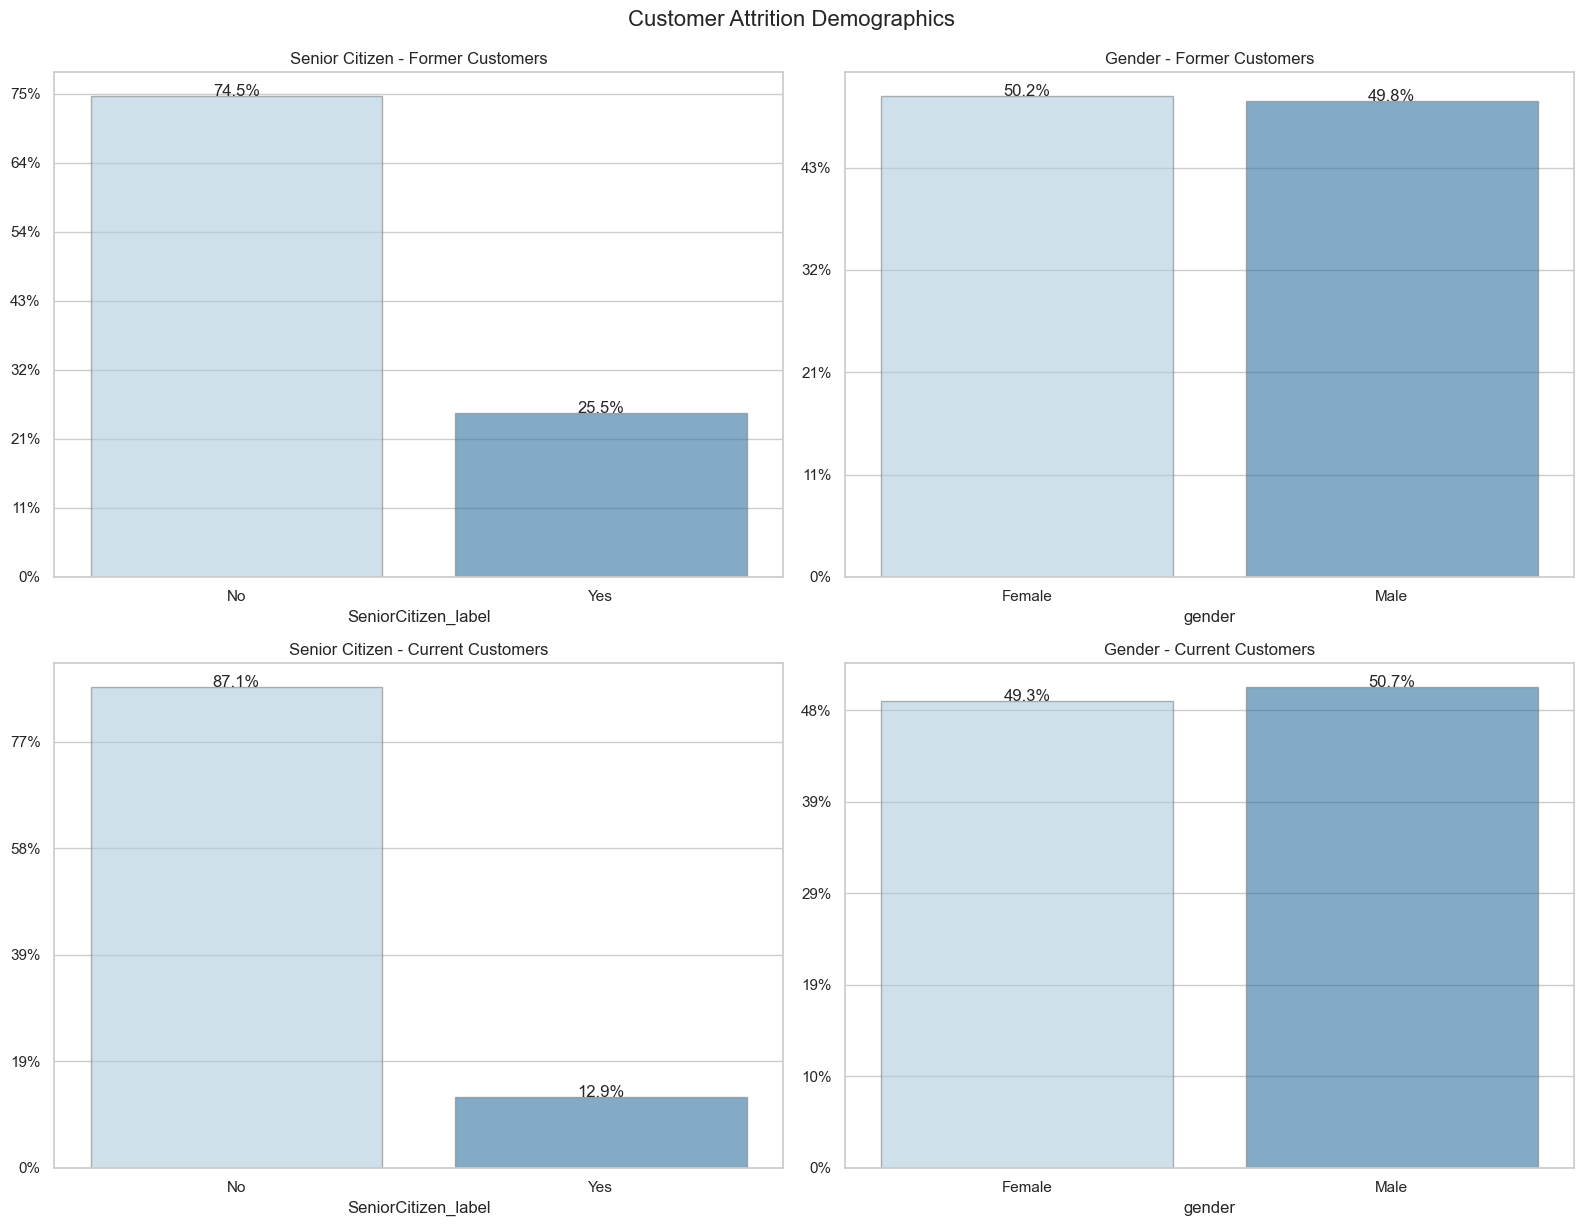

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Create Churn2 and SeniorCitizen_label columns
telco["Churn2"] = np.where(telco["Churn"]=="Yes", "Former Customers", "Current Customers")
telco["SeniorCitizen_label"] = np.where(telco["SeniorCitizen"]==1, "Yes", "No")

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes = axes.ravel()

# --- Senior Citizen - Former ---
data = telco[telco["Churn2"]=="Former Customers"]
sns.countplot(data=data, x="SeniorCitizen_label", palette="Paired", alpha=0.6, edgecolor="grey", ax=axes[0])
axes[0].set_title("Senior Citizen - Former Customers")
axes[0].set_ylabel("")
axes[0].yaxis.set_major_formatter(PercentFormatter(xmax=len(data)))
for p in axes[0].patches:
    count = p.get_height()
    percent = count / len(data)
    x = p.get_x() + p.get_width()/2
    axes[0].text(x, count+0.5, f"{percent:.1%}", ha='center')

# --- Gender - Former ---
sns.countplot(data=data, x="gender", palette="Paired", alpha=0.6, edgecolor="grey", ax=axes[1])
axes[1].set_title("Gender - Former Customers")
axes[1].set_ylabel("")
axes[1].yaxis.set_major_formatter(PercentFormatter(xmax=len(data)))
for p in axes[1].patches:
    count = p.get_height()
    percent = count / len(data)
    x = p.get_x() + p.get_width()/2
    axes[1].text(x, count+0.5, f"{percent:.1%}", ha='center')

# --- Senior Citizen - Current ---
data = telco[telco["Churn2"]=="Current Customers"]
sns.countplot(data=data, x="SeniorCitizen_label", palette="Paired", alpha=0.6, edgecolor="grey", ax=axes[2])
axes[2].set_title("Senior Citizen - Current Customers")
axes[2].set_ylabel("")
axes[2].yaxis.set_major_formatter(PercentFormatter(xmax=len(data)))
for p in axes[2].patches:
    count = p.get_height()
    percent = count / len(data)
    x = p.get_x() + p.get_width()/2
    axes[2].text(x, count+0.5, f"{percent:.1%}", ha='center')

# --- Gender - Current ---
sns.countplot(data=data, x="gender", palette="Paired", alpha=0.6, edgecolor="grey", ax=axes[3])
axes[3].set_title("Gender - Current Customers")
axes[3].set_ylabel("")
axes[3].yaxis.set_major_formatter(PercentFormatter(xmax=len(data)))
for p in axes[3].patches:
    count = p.get_height()
    percent = count / len(data)
    x = p.get_x() + p.get_width()/2
    axes[3].text(x, count+0.5, f"{percent:.1%}", ha='center')

plt.tight_layout()
plt.suptitle("Customer Attrition Demographics", fontsize=16, y=1.02)
plt.show()


quarter of the of the former customers were seniors and just 13 percent of current customers are 65 years or older. the gender distribution is proportional for both current and former customers

2.4 | Distributions and Correlations¶

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe
df = telco.copy()

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Encode Churn (Yes=1, No=0) if needed
le = LabelEncoder()
df['Churn_encoded'] = le.fit_transform(df['Churn'])  # 1=Yes, 0=No

# Split by Churn
df_yes = df[df['Churn']=='Yes']    # Former Customers
df_no  = df[df['Churn']=='No']     # Current Customers

# Select numeric columns
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Compute correlations for each group
corr = df[cols].corr()
corr_yes = df_yes[cols].corr()
corr_no  = df_no[cols].corr()
print("Correlation matrix for Churn = Yes (Former Customers):\n", corr, "\n")

print("Correlation matrix for Churn = Yes (Former Customers):\n", corr_yes, "\n")

print("Correlation matrix for Churn = No (Current Customers):\n", corr_no)


Correlation matrix for Churn = Yes (Former Customers):
                  tenure  MonthlyCharges  TotalCharges
tenure          1.00000        0.247900      0.825880
MonthlyCharges  0.24790        1.000000      0.651065
TotalCharges    0.82588        0.651065      1.000000 

Correlation matrix for Churn = Yes (Former Customers):
                   tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.401286      0.954017
MonthlyCharges  0.401286        1.000000      0.545772
TotalCharges    0.954017        0.545772      1.000000 

Correlation matrix for Churn = No (Current Customers):
                   tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.330892      0.793176
MonthlyCharges  0.330892        1.000000      0.757110
TotalCharges    0.793176        0.757110      1.000000


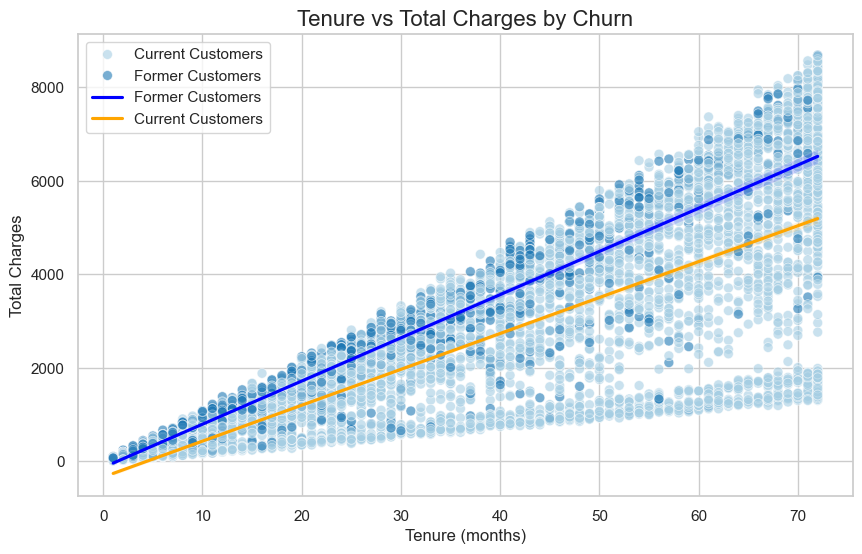

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map churn to readable labels
df['Churn_label'] = df['Churn'].map({'Yes': 'Former Customers', 'No': 'Current Customers'})

# Drop any rows with NaN in tenure or TotalCharges
df_plot = df[['tenure', 'TotalCharges', 'Churn_label']].dropna()

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_plot, 
    x='tenure', 
    y='TotalCharges', 
    hue='Churn_label', 
    alpha=0.6, 
    s=50, 
    palette='Paired'
)

# Add regression lines for each group
sns.regplot(
    data=df_plot[df_plot['Churn_label']=='Former Customers'], 
    x='tenure', 
    y='TotalCharges', 
    scatter=False, 
    color='blue', 
    label='Former Customers'
)
sns.regplot(
    data=df_plot[df_plot['Churn_label']=='Current Customers'], 
    x='tenure', 
    y='TotalCharges', 
    scatter=False, 
    color='orange', 
    label='Current Customers'
)

plt.title('Tenure vs Total Charges by Churn', fontsize=16)
plt.xlabel('Tenure (months)')
plt.ylabel('Total Charges')
plt.legend()
plt.show()


strong correlation between totalcharges and tenure especially for the former customers (0.95). also there is a slight positive relation between monthlycharges and tenure  (0.25)

In [23]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn2,SeniorCitizen_label
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,ECheck,29.85,29.85,No,Current Customers,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,MailedCheck,56.95,1889.5,No,Current Customers,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,MailedCheck,53.85,108.15,Yes,Former Customers,No
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,BankTransferAuto,42.30,1840.75,No,Current Customers,No
4,Female,0,No,No,2,Yes,No,FiberOptic,No,No,No,No,No,No,Month-to-month,Yes,ECheck,70.70,151.65,Yes,Former Customers,No


3 | Data Preprocessing

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# --- Simplify Contract labels ---
df = telco.copy()
df['Contract'] = df['Contract'].replace({
    'One year':'OneYear',
    'Two year':'TwoYear',
    'Month-to-month':'Month-to-month'
})


In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Ensure TotalCharges is numeric (coerce errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 1) Split train/test again for safety
X = df.drop(columns='Churn')
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=1
)

# 2) Categorical columns (object + category dtypes)
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove target-like or numeric columns misclassified as categorical
for c in ['Churn', 'Churn2', 'SeniorCitizen_label', 'TotalCharges']:
    if c in cat_cols:
        cat_cols.remove(c)

# 3) Numeric columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'TotalCharges' not in num_cols:
    num_cols.append('TotalCharges')  # make sure it's numeric

print("Numeric cols:", num_cols)
print("Categorical cols to OHE:", cat_cols)

# 4) Handle missing values
# Numeric: fill NaN with median
num_imputer = SimpleImputer(strategy='median')
X_numeric = pd.DataFrame(
    num_imputer.fit_transform(X_train[num_cols]),
    columns=num_cols,
    index=X_train.index
)

# Categorical: fill NaN with 'Missing'
for col in cat_cols:
    if pd.api.types.is_categorical_dtype(X_train[col]):
        X_train[col] = X_train[col].cat.add_categories('Missing')
    X_train[col] = X_train[col].fillna('Missing')

# 5) One-hot encode categorical columns
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_cat_ohe = pd.DataFrame(
    ohe.fit_transform(X_train[cat_cols]),
    columns=ohe.get_feature_names_out(cat_cols),
    index=X_train.index
)

# 6) Combine numeric + one-hot categorical
X_combined = pd.concat([X_numeric, X_cat_ohe], axis=1)

# 7) Apply SMOTE
sm = SMOTE(sampling_strategy=1.0, random_state=1, k_neighbors=5)
X_res_np, y_res = sm.fit_resample(X_combined, y_train)

# 8) Convert back to DataFrame
X_train_res = pd.DataFrame(X_res_np, columns=X_combined.columns)
y_train_res = pd.Series(y_res, name='Churn')

print("After SMOTE shapes:", X_train_res.shape, y_train_res.shape)
print("Some encoded columns:", X_train_res.columns[:10].tolist())


Numeric cols: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical cols to OHE: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
After SMOTE shapes: (7244, 23) (7244,)
Some encoded columns: ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_FiberOptic']


In [26]:
X_combined.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_FiberOptic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_OneYear', 'Contract_TwoYear', 'PaperlessBilling_Yes',
       'PaymentMethod_CreditCardAuto', 'PaymentMethod_ECheck',
       'PaymentMethod_MailedCheck'],
      dtype='object')

In [27]:
X_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7244 entries, 0 to 7243
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tenure                        7244 non-null   float64
 1   MonthlyCharges                7244 non-null   float64
 2   TotalCharges                  7244 non-null   float64
 3   gender_Male                   7244 non-null   float64
 4   SeniorCitizen_1               7244 non-null   float64
 5   Partner_Yes                   7244 non-null   float64
 6   Dependents_Yes                7244 non-null   float64
 7   PhoneService_Yes              7244 non-null   float64
 8   MultipleLines_Yes             7244 non-null   float64
 9   InternetService_FiberOptic    7244 non-null   float64
 10  InternetService_No            7244 non-null   float64
 11  OnlineSecurity_Yes            7244 non-null   float64
 12  OnlineBackup_Yes              7244 non-null   float64
 13  Dev

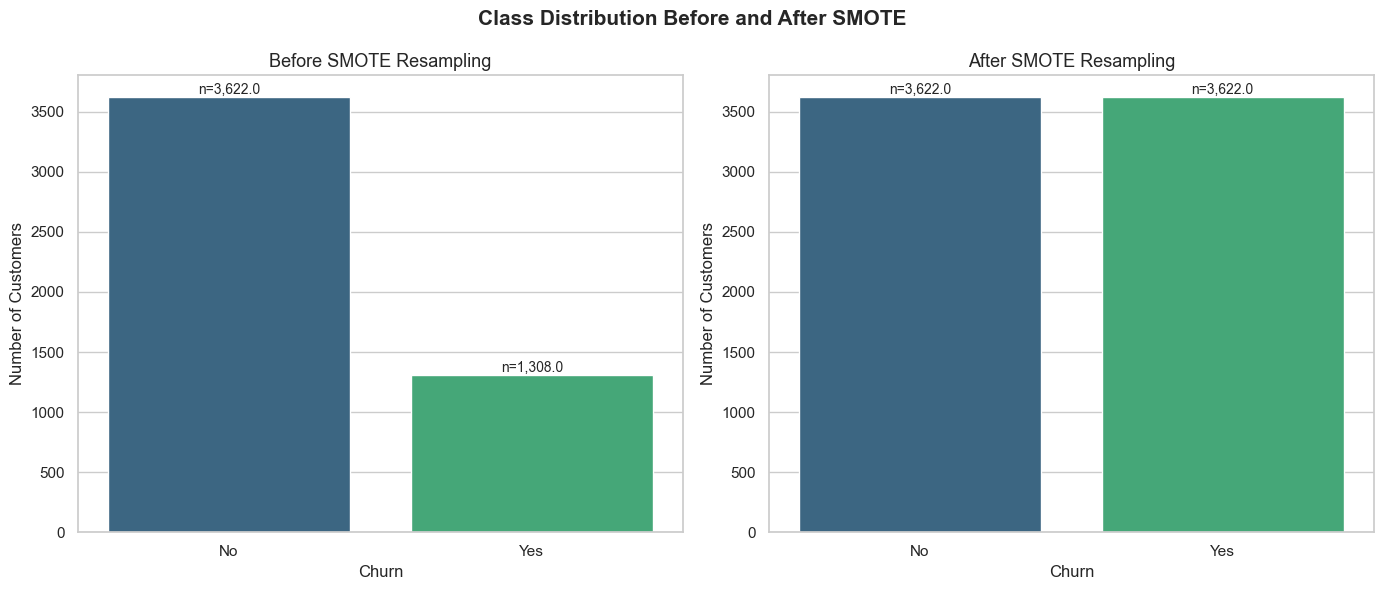

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ------------------ Before Resampling ------------------
sns.countplot(x=y_train, ax=axes[0], palette="viridis")
axes[0].set_title("Before SMOTE Resampling", fontsize=13)
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Number of Customers")

# Annotate counts
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f"n={height:,}", 
                     (p.get_x() + p.get_width() / 2, height + 5), 
                     ha='center', va='bottom', fontsize=10)

# ------------------ After Resampling ------------------
sns.countplot(x=y_train_res, ax=axes[1], palette="viridis")
axes[1].set_title("After SMOTE Resampling", fontsize=13)
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Number of Customers")

# Annotate counts
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f"n={height:,}", 
                     (p.get_x() + p.get_width() / 2, height + 5), 
                     ha='center', va='bottom', fontsize=10)

# ------------------ Main Title & Layout ------------------
plt.suptitle("Class Distribution Before and After SMOTE", fontsize=15, weight='bold')
plt.tight_layout()
plt.show()


the target is churn ,but in our dataset we have 26 % of our customers are churn so we have to balance our dataset because if not it will affect our model accuracy and precision ,so we are going to use synthetic minority over-sampling technique known as smote to create a more evenly distributed training set. 

he smote algorithm artificially generates new instances of the minority class using the nearest neighbors of these cases and under-samples the majority class to create a more balanced data set. After applying smote, our training set now consists of an equal proportion of current and former customers.

4 | Feature Selection

4.1 | Chi-Squared Tests

In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

from imblearn.pipeline import Pipeline as ImbPipeline

# -----------------------------
# 1) Data preparation
# -----------------------------
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

X = df.drop(columns='Churn')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=1
)

# Identify numeric & categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove unwanted columns if present
for col in ['Churn', 'Churn2', 'SeniorCitizen_label']:
    if col in cat_cols: cat_cols.remove(col)
    if col in num_cols: num_cols.remove(col)

# Ensure TotalCharges is numeric
if 'TotalCharges' not in num_cols:
    num_cols.append('TotalCharges')

# Convert categorical columns to string to avoid CategoricalDtype issues
X_train[cat_cols] = X_train[cat_cols].astype(str)
X_test[cat_cols] = X_test[cat_cols].astype(str)

# -----------------------------
# 2) Preprocessing pipelines
# -----------------------------
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])




In [30]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn2,SeniorCitizen_label
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,ECheck,29.85,29.85,No,Current Customers,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,MailedCheck,56.95,1889.5,No,Current Customers,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,MailedCheck,53.85,108.15,Yes,Former Customers,No
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,BankTransferAuto,42.30,1840.75,No,Current Customers,No
4,Female,0,No,No,2,Yes,No,FiberOptic,No,No,No,No,No,No,Month-to-month,Yes,ECheck,70.70,151.65,Yes,Former Customers,No


Gender and PhoneService have very small chi-squared statistics and p-values that are greater than the significance threshold  
a of 0.05 indicating they are independent of our target variable. The rest of the categorical features do have a statistically significant association to customer churn.

4.2 | Variable Importance

In [31]:
telco.drop("Churn2", axis=1, inplace=True)

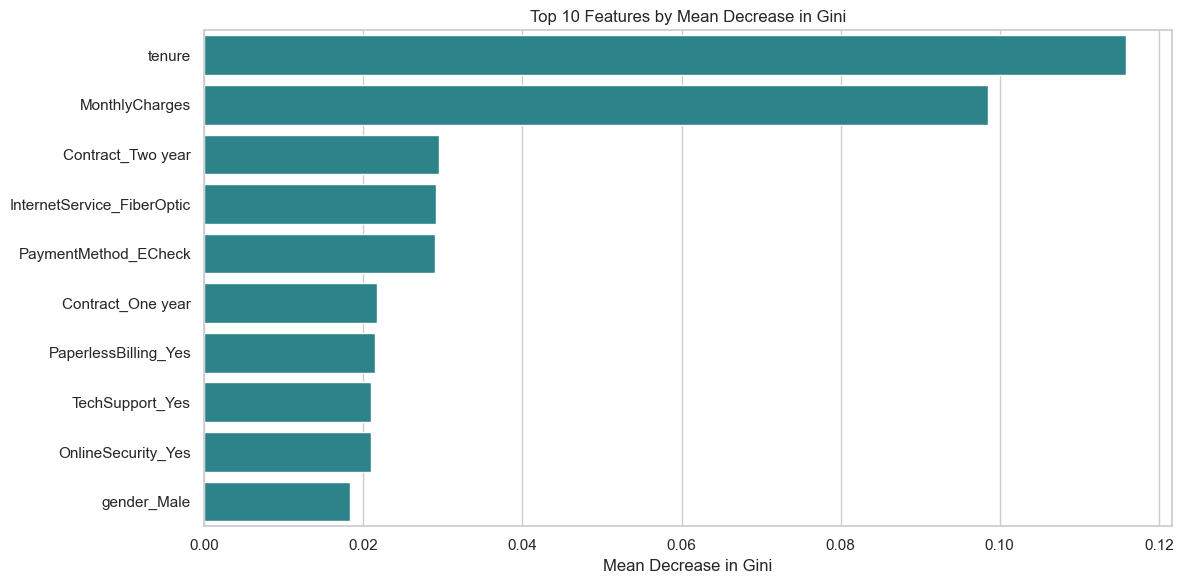

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Prepare data
X = pd.get_dummies(telco.drop(columns=['Churn']), drop_first=True)
X = X.fillna(0)
y = telco['Churn'].map({'Yes': 1, 'No': 0})

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=200,       # fewer trees to speed up
    max_features='sqrt',
    n_jobs=-1,
    random_state=1
)
rf.fit(X, y)

# Feature Importance (Mean Decrease in Gini)
importances_gini = rf.feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'MeanDecreaseGini': importances_gini
})

# Sort top 10
top_gini = importance_df.sort_values('MeanDecreaseGini', ascending=False).head(10)

# Plot Mean Decrease in Gini
plt.figure(figsize=(12,6))
sns.barplot(x='MeanDecreaseGini', y='Feature', data=top_gini, color="#1C9099")
plt.title("Top 10 Features by Mean Decrease in Gini")
plt.xlabel("Mean Decrease in Gini")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [33]:
X_train_res.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_FiberOptic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_OneYear', 'Contract_TwoYear', 'PaperlessBilling_Yes',
       'PaymentMethod_CreditCardAuto', 'PaymentMethod_ECheck',
       'PaymentMethod_MailedCheck'],
      dtype='object')

In [43]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
# -----------------------------
# 3) Logistic Regression with SMOTE
# -----------------------------
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=1.0, random_state=1)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=21, class_weight='balanced'))
])

# -----------------------------
# 4) Fit and predict
# -----------------------------
pipeline.fit(X_train, y_train)

y_pred_lr = pipeline.predict(X_test)
y_proba_lr = pipeline.predict_proba(X_test)[:, 1]

# -----------------------------
# 5) Evaluation
# -----------------------------
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nTest ROC AUC:", roc_auc_score(y_test, y_proba_lr))


Confusion Matrix:
 [[1117  435]
 [ 117  444]]

Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.73      0.81      1552
         Yes       0.51      0.78      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.76      2113


Test ROC AUC: 0.8397444732344672


In [38]:
# -----------------------------
# 1) Prepare test data (numeric + categorical)
# -----------------------------

# Impute numeric features
X_test_num = pd.DataFrame(
    num_imputer.transform(X_test[num_cols]),
    columns=num_cols,
    index=X_test.index
)

# Fill missing categorical values & one-hot encode
X_test_cat = X_test[cat_cols].fillna('Missing')
X_test_cat_ohe = pd.DataFrame(
    ohe.transform(X_test_cat),
    columns=ohe.get_feature_names_out(cat_cols),
    index=X_test.index
)

# Combine numeric and categorical features
X_test_combined = pd.concat([X_test_num, X_test_cat_ohe], axis=1)

# -----------------------------
# 2) Fit QDA
# -----------------------------
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_res, y_train_res)

# -----------------------------
# 3) Predict on processed test set
# -----------------------------
y_pred_qda = qda.predict(X_test_combined)
y_proba_qda = qda.predict_proba(X_test_combined)[:, 1]

# -----------------------------
# 4) Evaluation
# -----------------------------
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_qda))
print("\nClassification Report:\n", classification_report(y_test, y_pred_qda))
print("\nTest ROC AUC:", roc_auc_score(y_test.map({'No': 0, 'Yes': 1}), y_proba_qda))


Confusion Matrix:
 [[1145  407]
 [ 135  426]]

Classification Report:
               precision    recall  f1-score   support

          No       0.89      0.74      0.81      1552
         Yes       0.51      0.76      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.74      0.76      2113


Test ROC AUC: 0.8341022796185016


In [45]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# -----------------------------
# 1) Build SVM pipeline (only scale numeric features)
# -----------------------------
# Identify numeric columns in X_train_res
numeric_cols = X_train_res.select_dtypes(include=['int64', 'float64', 'float32']).columns.tolist()

# SVM pipeline: scale numeric features, keep one-hot as is
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # will scale all features (numeric + one-hot)
    ('svm', SVC(kernel='linear', probability=True, random_state=21, class_weight='balanced'))
])

# -----------------------------
# 2) Fit on resampled training set
# -----------------------------
svm_pipeline.fit(X_train_res, y_train_res)



y_pred_svm = svm_pipeline.predict(X_test_combined)
y_proba_svm = svm_pipeline.predict_proba(X_test_combined)[:, 1]

# -----------------------------
# 4) Evaluation
# -----------------------------
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nTest ROC AUC:", roc_auc_score(y_test, y_proba_svm))


Confusion Matrix:
 [[1117  435]
 [ 117  444]]

Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.72      0.80      1552
         Yes       0.51      0.79      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113


Test ROC AUC: 0.8416418582428286


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# -----------------------------
# 1) Build Random Forest
# -----------------------------
rf_model = RandomForestClassifier(
    n_estimators=500,
    random_state=21,
    class_weight='balanced'
)

# -----------------------------
# 2) Fit on resampled training data
# -----------------------------
rf_model.fit(X_train_res, y_train_res)

# -----------------------------
# 3) Predict on preprocessed test data
# -----------------------------
y_pred_rf = rf_model.predict(X_test_combined)
y_proba_rf = rf_model.predict_proba(X_test_combined)[:, 1]

# -----------------------------
# 4) Evaluation
# -----------------------------
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nTest ROC AUC:", roc_auc_score(y_test, y_proba_rf))


Confusion Matrix:
 [[1380  172]
 [ 283  278]]

Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.89      0.86      1552
         Yes       0.62      0.50      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.78      2113


Test ROC AUC: 0.8162660565632065


In [49]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Logistic Regression': (y_pred_lr, y_proba_lr),
    'QDA': (y_pred_qda, y_proba_qda),
    'SVM': (y_pred_svm, y_proba_svm),
    'Random Forest': (y_pred_rf, y_proba_rf)
}

metrics_list = []

for name, (y_pred_model, y_proba_model) in models.items():
    precision = precision_score(y_test, y_pred_model, pos_label='Yes')
    recall = recall_score(y_test, y_pred_model, pos_label='Yes')
    f1 = f1_score(y_test, y_pred_model, pos_label='Yes')
    roc_auc = roc_auc_score(y_test.map({'No':0, 'Yes':1}), y_proba_model)
    
    metrics_list.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC_AUC': roc_auc
    })

metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.sort_values(by='F1', ascending=False)
metrics_df[['Precision','Recall','F1','ROC_AUC']] = metrics_df[['Precision','Recall','F1','ROC_AUC']].applymap(lambda x: f"{x*100:.1f}%")
print(metrics_df)


                 Model Precision Recall     F1 ROC_AUC
0  Logistic Regression     51.1%  78.4%  61.9%   84.0%
2                  SVM     50.5%  79.1%  61.7%   84.2%
1                  QDA     51.1%  75.9%  61.1%   83.4%
3        Random Forest     61.8%  49.6%  55.0%   81.6%
